# 第三题

       id   carid  startday starttime  startweidu  startjingdu    endday  \
0       4  459074  1/5/2018   6:09:49   39.970322   116.351395  1/5/2018   
1       3  420604  1/5/2018   6:07:14   39.756088   116.312943  1/5/2018   
2       5  165558  1/5/2018   6:17:56   39.953842   116.436539  1/5/2018   
3      29  258590  1/5/2018   8:09:42   39.850845   116.488724  1/5/2018   
4      28  373864  1/5/2018   8:08:09   39.986801   116.442032  1/5/2018   
...   ...     ...       ...       ...         ...          ...       ...   
7543  759  299501  3/5/2018  13:57:37   39.955215   116.358261  3/5/2018   
7544  757  375130  3/5/2018  13:48:34   39.787674   116.326675  3/5/2018   
7545  756   29137  3/5/2018  13:47:58   39.776688   116.514816  3/5/2018   
7546  755  119594  3/5/2018  13:46:46   39.930496   116.236038  3/5/2018   
7547  758  373632  3/5/2018  13:49:44   39.925003   116.509323  3/5/2018   

       endtime   endweidu   endjingdu  行驶距离（km）  收取费用(元)      公里数单价  
0      7:00:24  3

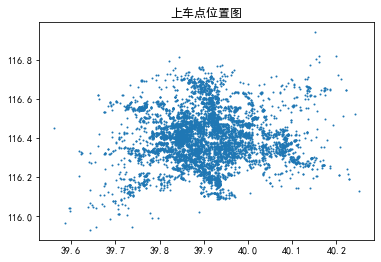

In [3]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
data=pd.read_csv(r'E:\OneDrive\桌面\4.17 2022数模大作业\B题  共享汽车运营策略探讨\附件3：B题数据.csv',encoding = 'gb2312')
print(data)
plt.scatter(data['startweidu'],data['startjingdu'],s=1)
plt.title('上车点位置图')
plt.savefig('dingjia')
plt.show()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import time
from sklearn.cluster import DBSCAN,KMeans,k_means
from sklearn.preprocessing import scale
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 导入轮廓系数所需要的库
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [5]:
print(data[['startweidu','startjingdu']])

      startweidu  startjingdu
0      39.970322   116.351395
1      39.756088   116.312943
2      39.953842   116.436539
3      39.850845   116.488724
4      39.986801   116.442032
...          ...          ...
7543   39.955215   116.358261
7544   39.787674   116.326675
7545   39.776688   116.514816
7546   39.930496   116.236038
7547   39.925003   116.509323

[7548 rows x 2 columns]


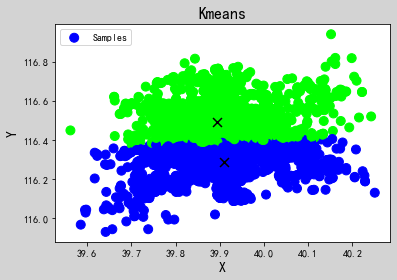

1    4032
0    3516
dtype: int64
[[ 39.91017291 116.2902588 ]
 [ 39.89332231 116.49306405]]
0.3549135170512621
[0.27330833 0.23880378 0.30292893 ... 0.45149132 0.53704246 0.53557892]
(7548,)


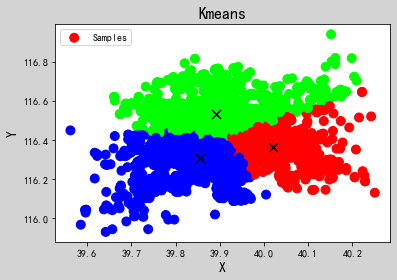

0    3370
2    2640
1    1538
dtype: int64
[[ 39.85467817 116.3085417 ]
 [ 40.02117801 116.36452028]
 [ 39.89055664 116.5337036 ]]
0.34458036852259577
[0.40503132 0.48810745 0.17361737 ... 0.36844492 0.20884481 0.44560922]
(7548,)


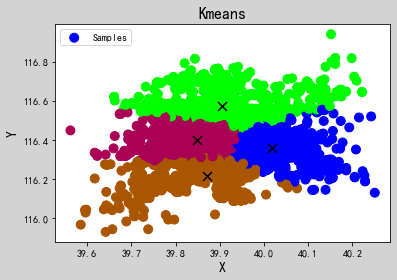

1    2870
3    1722
0    1562
2    1394
dtype: int64
[[ 40.01843695 116.36066041]
 [ 39.84914557 116.40178053]
 [ 39.87192905 116.21673633]
 [ 39.90531175 116.57530104]]
0.38582124885327534
[0.38259543 0.18618589 0.0213849  ... 0.11187953 0.44585915 0.21237629]
(7548,)


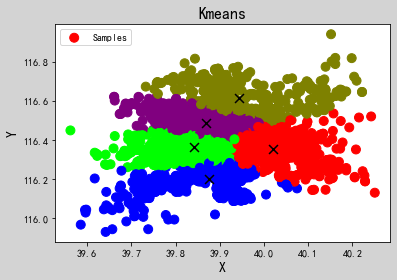

4    2216
1    1742
2    1502
0    1157
3     931
dtype: int64
[[ 39.87647099 116.20083278]
 [ 39.86827575 116.48737091]
 [ 40.02087673 116.35753321]
 [ 39.94317888 116.61843264]
 [ 39.84144229 116.36712834]]
0.35579238072138936
[0.36368439 0.38066461 0.10020002 ... 0.32436559 0.45480552 0.37507322]
(7548,)


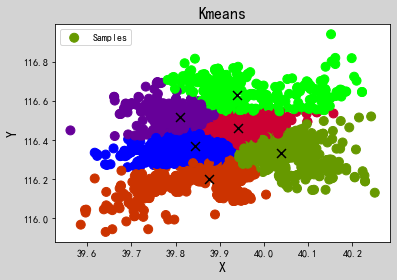

0    2360
2    1308
3    1175
4    1124
5     813
1     768
dtype: int64
[[ 39.84473866 116.37090107]
 [ 39.8100096  116.51769161]
 [ 39.94077179 116.46298241]
 [ 39.87495267 116.20280013]
 [ 40.03775098 116.33715138]
 [ 39.93846603 116.6297982 ]]
0.3753327664832899
[0.25714281 0.35088549 0.56212255 ... 0.56679721 0.43641355 0.45341568]
(7548,)


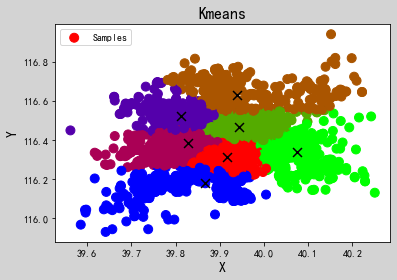

2    1842
5    1289
3    1261
0     874
4     800
6     745
1     737
dtype: int64
[[ 39.86589975 116.18019784]
 [ 39.8117688  116.52172176]
 [ 39.82902353 116.38596027]
 [ 39.91566641 116.31673483]
 [ 39.9381069  116.63111805]
 [ 39.94340173 116.46519477]
 [ 40.07407361 116.3383743 ]]
0.37391142674909034
[0.3654254  0.32154293 0.54824451 ... 0.51174218 0.10413719 0.45034253]
(7548,)


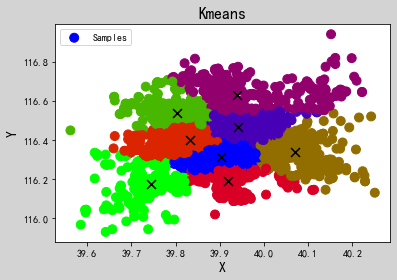

4    1840
0    1321
1    1301
2     788
5     778
3     659
6     576
7     285
dtype: int64
[[ 39.90247129 116.31639395]
 [ 39.9419315  116.46577923]
 [ 39.9400012  116.63120444]
 [ 39.91957866 116.19009443]
 [ 39.83242717 116.39906853]
 [ 40.06945489 116.34225175]
 [ 39.80294045 116.53965036]
 [ 39.74369009 116.17724208]]
0.3922787440071412
[0.25909741 0.18916246 0.54492058 ... 0.49094453 0.3555107  0.4949512 ]
(7548,)


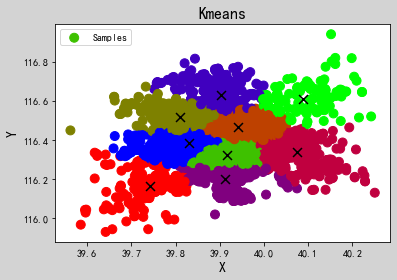

0    1800
5    1274
7    1163
2     782
3     725
6     720
1     668
4     256
8     160
dtype: int64
[[ 39.83048796 116.38668266]
 [ 39.90385273 116.63361624]
 [ 39.91167229 116.20070143]
 [ 40.07407636 116.3394795 ]
 [ 39.74252701 116.16480946]
 [ 39.94043048 116.46689123]
 [ 39.81097799 116.51744668]
 [ 39.91664425 116.32533159]
 [ 40.08720589 116.61244011]]
0.40031233460337917
[0.40252538 0.29773184 0.52004071 ... 0.52388951 0.38095598 0.468825  ]
(7548,)


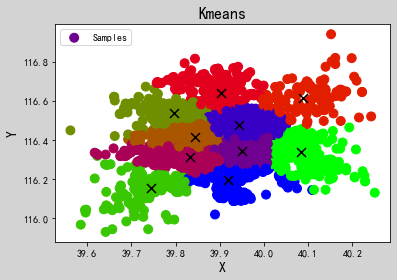

6    1699
1    1116
3     934
2     907
0     734
9     639
4     619
7     506
8     236
5     158
dtype: int64
[[ 39.91953982 116.19777316]
 [ 39.94248971 116.47951136]
 [ 39.95052061 116.34592715]
 [ 39.83168396 116.31209118]
 [ 39.90261552 116.63936202]
 [ 40.08799879 116.61371931]
 [ 39.84447142 116.41463479]
 [ 39.79674961 116.53789083]
 [ 39.74482262 116.15346618]
 [ 40.08286275 116.34050074]]
0.41409788423447763
[0.61937481 0.36284523 0.35344422 ... 0.49227412 0.49083536 0.5489349 ]
(7548,)


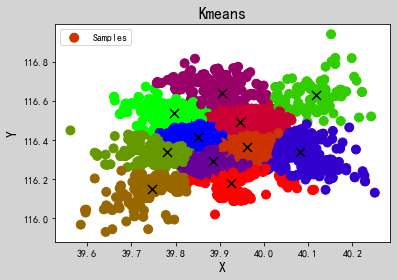

0     1714
4      977
2      918
6      799
1      640
3      620
5      558
10     498
8      484
7      230
9      110
dtype: int64
[[ 39.85025598 116.41757687]
 [ 40.08231997 116.33855867]
 [ 39.88554372 116.2928288 ]
 [ 39.90440369 116.64034837]
 [ 39.94589961 116.49134357]
 [ 39.92548383 116.18083043]
 [ 39.96153946 116.36715489]
 [ 39.7479739  116.1497    ]
 [ 39.78070819 116.33803628]
 [ 40.11858715 116.63245738]
 [ 39.79663068 116.53878821]]
0.409825497947813
[0.57484212 0.56868553 0.10811569 ... 0.49964405 0.1778748  0.55821508]
(7548,)


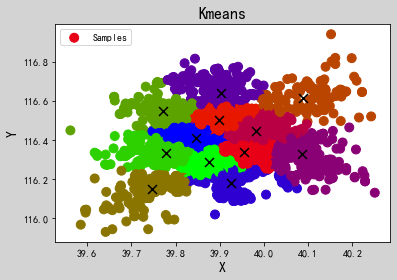

0     1588
6      849
11     799
5      719
4      711
2      580
1      561
3      561
10     450
9      348
8      227
7      155
dtype: int64
[[ 39.84738098 116.41148046]
 [ 39.92473282 116.18174039]
 [ 39.90312274 116.64320479]
 [ 40.08677477 116.3282323 ]
 [ 39.98091589 116.44735506]
 [ 39.95427    116.34091257]
 [ 39.89926153 116.50435889]
 [ 40.08770703 116.61643982]
 [ 39.7469471  116.14892195]
 [ 39.77074064 116.54991019]
 [ 39.7785614  116.33674316]
 [ 39.87672356 116.29028406]]
0.4102504390567872
[0.59338577 0.55925074 0.45804381 ... 0.54507449 0.22171099 0.48781362]
(7548,)


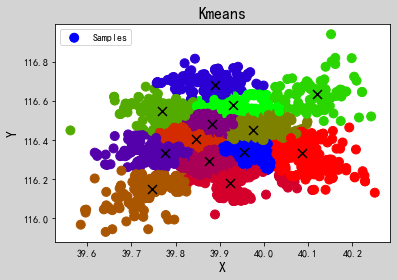

7     1418
3      837
4      784
9      727
0      717
6      588
5      576
12     483
2      434
10     333
1      317
8      227
11     107
dtype: int64
[[ 39.95555542 116.33896397]
 [ 39.88928879 116.6801979 ]
 [ 39.77711578 116.33614256]
 [ 39.88203069 116.48544393]
 [ 39.87538963 116.29205449]
 [ 39.92420949 116.18320214]
 [ 40.08605646 116.33445272]
 [ 39.84564949 116.40523774]
 [ 39.7469471  116.14892195]
 [ 39.9748061  116.44973325]
 [ 39.76896338 116.54847635]
 [ 40.11977935 116.63560172]
 [ 39.92942936 116.58132443]]
0.4095488143453804
[0.59432234 0.56105319 0.47037591 ... 0.50269349 0.23541301 0.29542144]
(7548,)


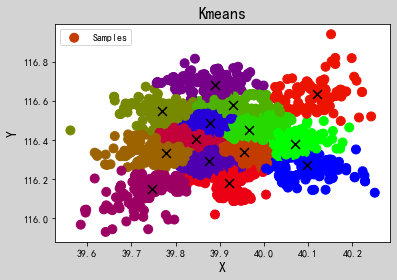

5     1411
1      793
2      779
12     715
8      705
6      558
11     490
9      440
13     412
10     332
3      317
0      263
4      227
7      106
dtype: int64
[[ 40.09707172 116.27267322]
 [ 39.87905755 116.48578321]
 [ 39.87611846 116.29139538]
 [ 39.88935814 116.68004442]
 [ 39.7469471  116.14892195]
 [ 39.84560699 116.40525645]
 [ 39.92086595 116.1823125 ]
 [ 40.11963466 116.63689667]
 [ 39.95378747 116.33975001]
 [ 39.77806091 116.33588051]
 [ 39.76886152 116.54868529]
 [ 39.92950361 116.58082167]
 [ 39.96633586 116.45283815]
 [ 40.06996043 116.38039749]]
0.4132129567961345
[0.60259458 0.56111221 0.52728366 ... 0.48861587 0.24774503 0.26415341]
(7548,)


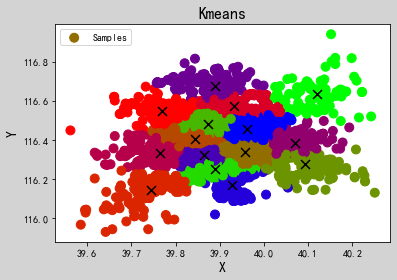

9     1358
0      752
12     729
10     663
2      620
6      502
13     502
1      423
4      376
7      332
3      332
5      327
11     304
8      222
14     106
dtype: int64
[[ 39.96196519 116.45502615]
 [ 39.92815221 116.16926315]
 [ 39.86423881 116.32400205]
 [ 39.89037474 116.67736624]
 [ 40.07017379 116.38739971]
 [ 39.76413902 116.33432721]
 [ 39.93174042 116.57572723]
 [ 39.76933843 116.54999335]
 [ 39.74535555 116.14757847]
 [ 39.84326643 116.40637487]
 [ 39.9564419  116.34159341]
 [ 40.09216509 116.2800558 ]
 [ 39.87313361 116.48361383]
 [ 39.8902659  116.25060002]
 [ 40.11963466 116.63689667]]
0.39896260972445896
[0.63388146 0.55690226 0.53939508 ... 0.46409482 0.24115546 0.14993592]
(7548,)


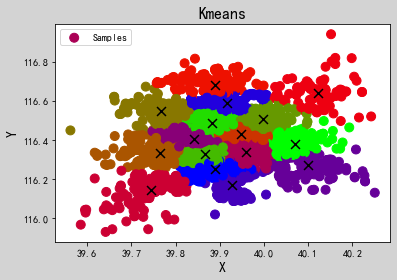

4     1349
14     794
13     650
5      641
9      525
0      498
1      431
2      423
15     410
10     329
11     323
12     300
8      296
3      256
6      222
7      101
dtype: int64
[[ 39.88835438 116.25054601]
 [ 39.91570693 116.58928131]
 [ 39.92786326 116.16941249]
 [ 40.09915888 116.27251088]
 [ 39.84176557 116.40826231]
 [ 39.95834921 116.33724248]
 [ 39.74535555 116.14757847]
 [ 40.12233545 116.64073755]
 [ 39.88965009 116.68386562]
 [ 39.94915774 116.43188841]
 [ 39.7644407  116.33423478]
 [ 39.76729992 116.54825571]
 [ 39.9980785  116.50658109]
 [ 39.86605718 116.32722684]
 [ 39.88223163 116.48797989]
 [ 40.06982831 116.38026726]]
0.4043380524162142
[0.53841663 0.56494452 0.6252129  ... 0.50961475 0.22670119 0.31524383]
(7548,)


In [6]:
m=0
for i in list(range(2,17)):# KMeans聚类
    model = KMeans(n_clusters=i)
    y_pred = model.fit_predict(data[['startweidu','startjingdu']])

    # 画图显示样本数据
    plt.figure('Kmeans', facecolor='lightgray')
    plt.title('Kmeans', fontsize=16)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
    plt.tick_params(labelsize=10)
    plt.scatter(data['startweidu'], data['startjingdu'], s=80, c=y_pred, cmap='brg', label='Samples')
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],marker="x",s=80,c="black")
    plt.legend()
    plt.show()
    print(pd.value_counts(model.labels_))
    print(model.cluster_centers_)
    # 查看轮廓系数均值
    print(silhouette_score(data[['startweidu','startjingdu']],model.labels_))
    # 输出结果
    # 查看每一样本轮廓系数
    print(silhouette_samples(data[['startweidu','startjingdu']],model.labels_))
    # 输出结果
    # 查看样本轮廓系数结果的数组结构
    print(silhouette_samples(data[['startweidu','startjingdu']],model.labels_).shape)
    # 输出结果

In [5]:
print(pd.value_counts(model.labels_))
print(model.cluster_centers_)

8     1294
11     685
0      673
4      611
9      543
12     500
15     495
1      421
10     401
2      396
13     326
3      317
6      298
14     260
7      222
5      106
dtype: int64
[[ 39.92008618 116.46342005]
 [ 39.92784097 116.16916774]
 [ 40.07137789 116.37840732]
 [ 39.88935814 116.68004442]
 [ 39.86424785 116.32275783]
 [ 40.11963466 116.63689667]
 [ 39.76553946 116.55500239]
 [ 39.74535555 116.14757847]
 [ 39.84376378 116.40376621]
 [ 39.84804026 116.48333994]
 [ 39.99509176 116.46234301]
 [ 39.956826   116.34314485]
 [ 39.89075592 116.2503122 ]
 [ 39.76400785 116.33422852]
 [ 40.09730354 116.27207653]
 [ 39.92642351 116.57953852]]


In [6]:
# 导入轮廓系数所需要的库
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
 
# 查看轮廓系数均值
print(silhouette_score(data[['startweidu','startjingdu']],model.labels_))
# 输出结果
# 查看每一样本轮廓系数
print(silhouette_samples(data[['startweidu','startjingdu']],model.labels_))
# 输出结果
# 查看样本轮廓系数结果的数组结构
print(silhouette_samples(data[['startweidu','startjingdu']],model.labels_).shape)
# 输出结果

0.4004156686319057
[0.63259658 0.55650075 0.15043867 ... 0.3137042  0.24531827 0.33725811]
(7548,)


In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
print(data)

       id   carid  startday starttime  startweidu  startjingdu    endday  \
0       4  459074  1/5/2018  06:09:49   39.970322   116.351395  1/5/2018   
1       3  420604  1/5/2018  06:07:14   39.756088   116.312943  1/5/2018   
2       5  165558  1/5/2018  06:17:56   39.953842   116.436539  1/5/2018   
3      29  258590  1/5/2018  08:09:42   39.850845   116.488724  1/5/2018   
4      28  373864  1/5/2018  08:08:09   39.986801   116.442032  1/5/2018   
...   ...     ...       ...       ...         ...          ...       ...   
7543  759  299501  3/5/2018  13:57:37   39.955215   116.358261  3/5/2018   
7544  757  375130  3/5/2018  13:48:34   39.787674   116.326675  3/5/2018   
7545  756   29137  3/5/2018  13:47:58   39.776688   116.514816  3/5/2018   
7546  755  119594  3/5/2018  13:46:46   39.930496   116.236038  3/5/2018   
7547  758  373632  3/5/2018  13:49:44   39.925003   116.509323  3/5/2018   

       endtime   endweidu   endjingdu  行驶距离（km）  收取费用(元)      公里数单价  
0     07:00:24  3

簇数为 2 ，轮廓系数均值为 0.3554167874453217


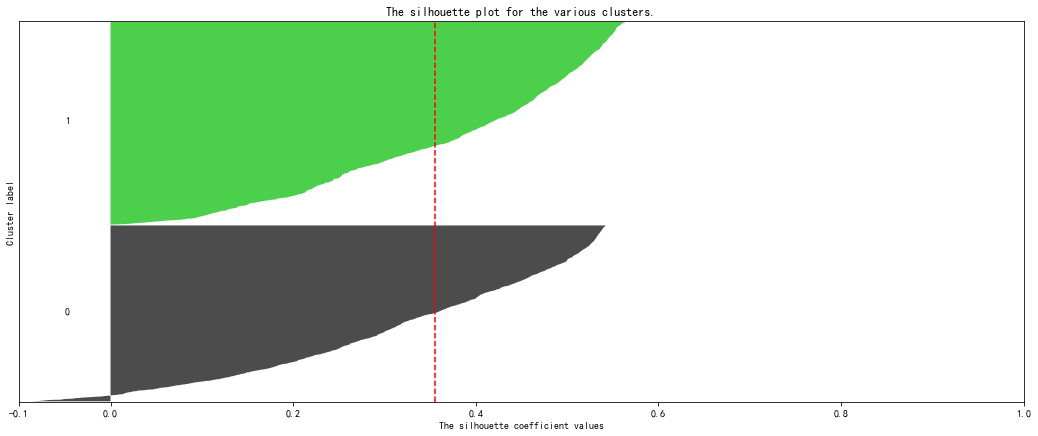

簇数为 3 ，轮廓系数均值为 0.3392548027424869


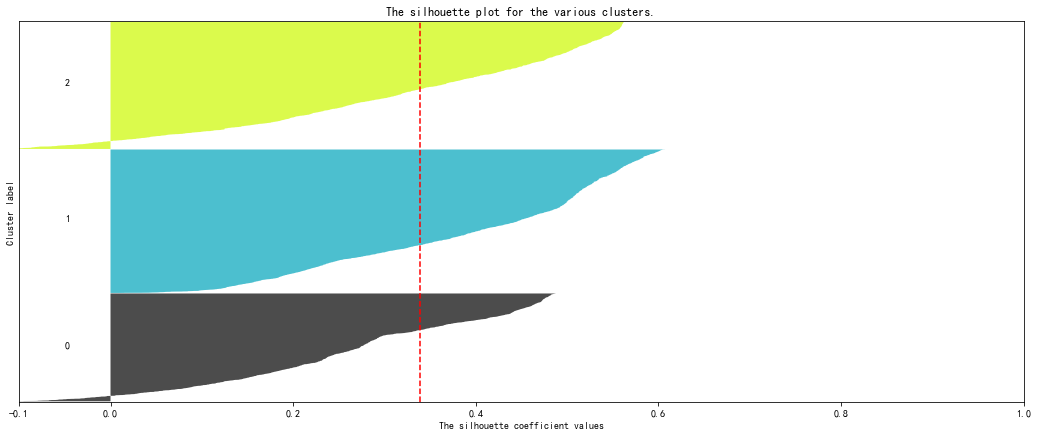

簇数为 4 ，轮廓系数均值为 0.3858480838550429


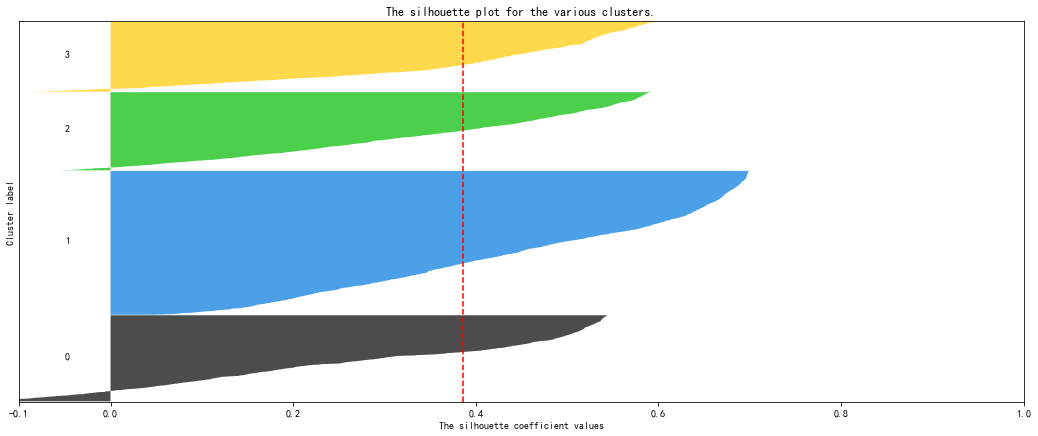

簇数为 5 ，轮廓系数均值为 0.35671330528135303


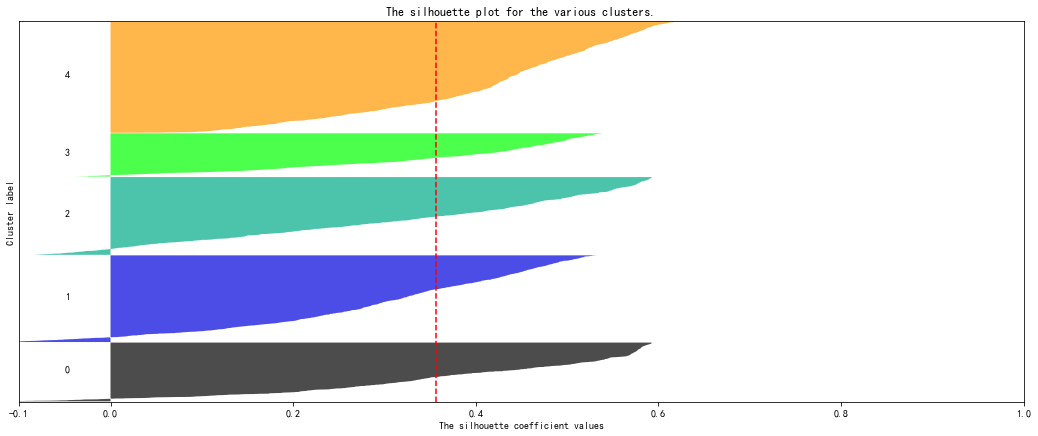

簇数为 6 ，轮廓系数均值为 0.3752796191726017


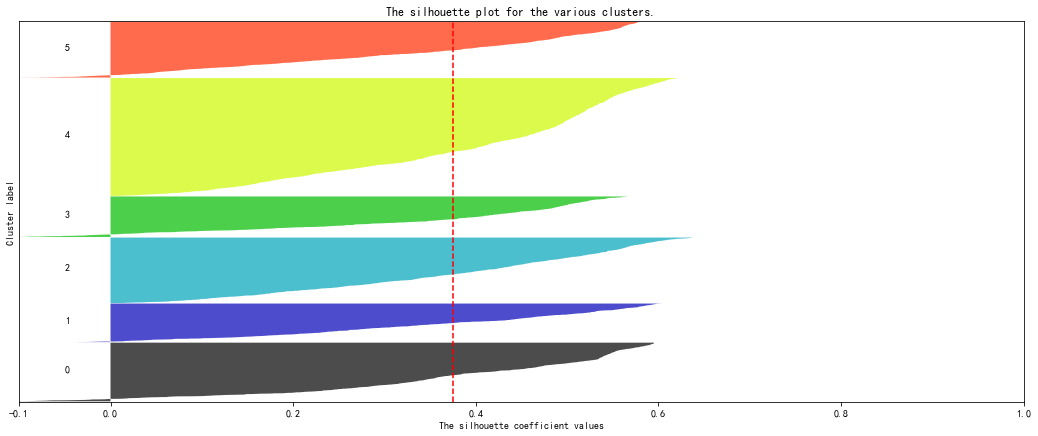

簇数为 7 ，轮廓系数均值为 0.3751414340928068


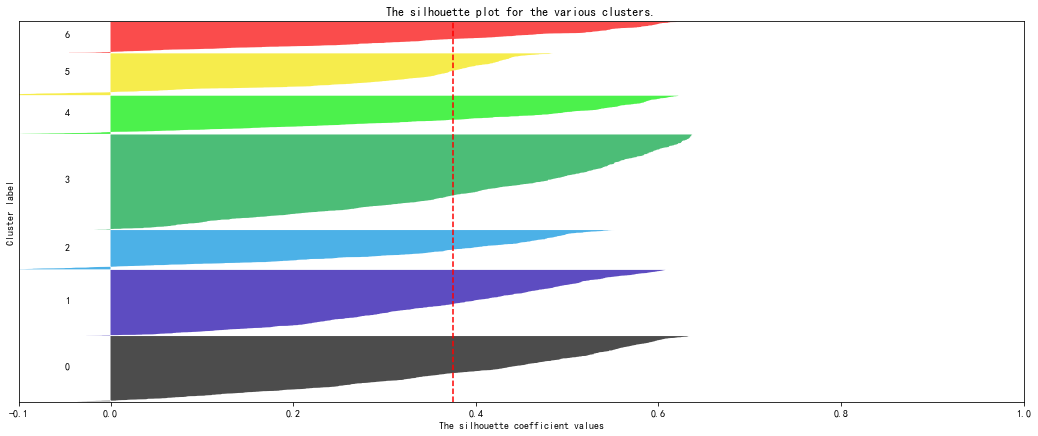

簇数为 8 ，轮廓系数均值为 0.3922748502293382


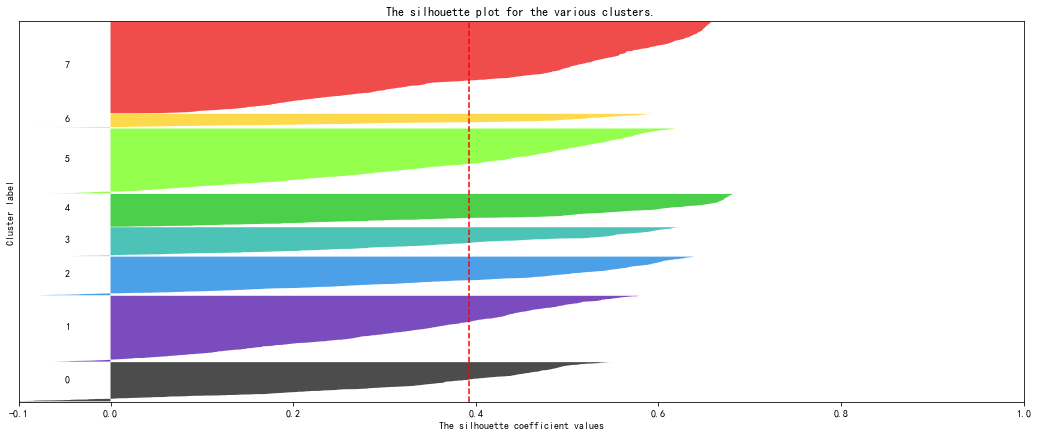

簇数为 10 ，轮廓系数均值为 0.4141627263169435


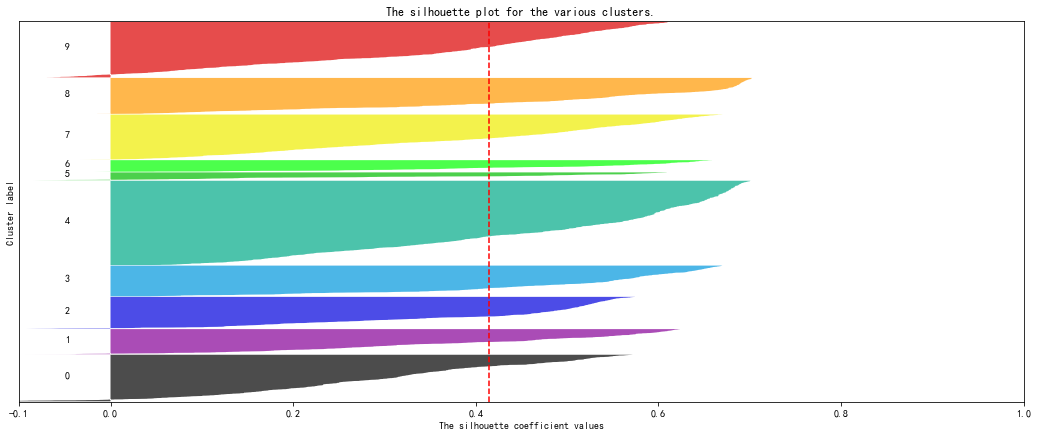

簇数为 12 ，轮廓系数均值为 0.41104122480232974


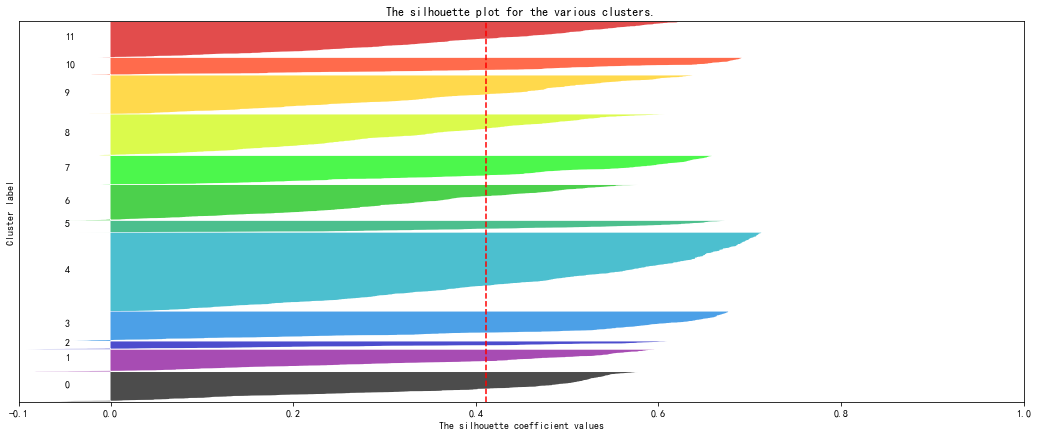

簇数为 13 ，轮廓系数均值为 0.4144403912091313


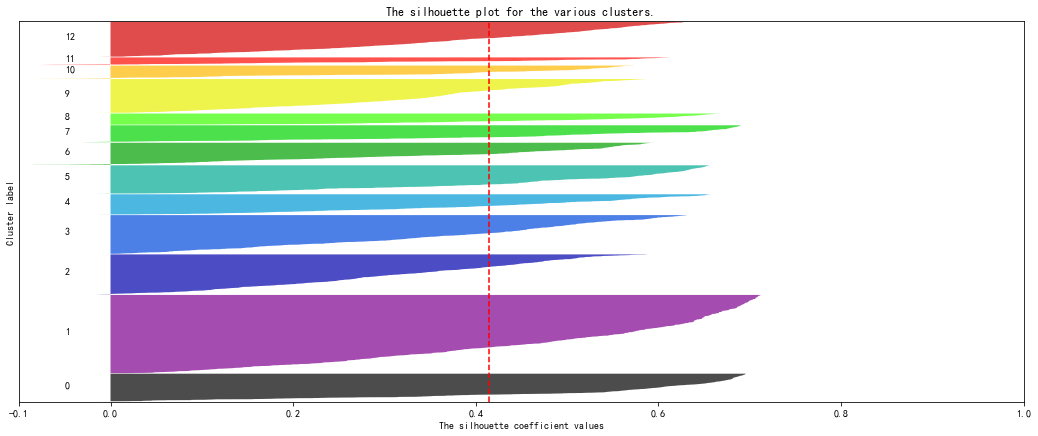

簇数为 16 ，轮廓系数均值为 0.39611134332269404


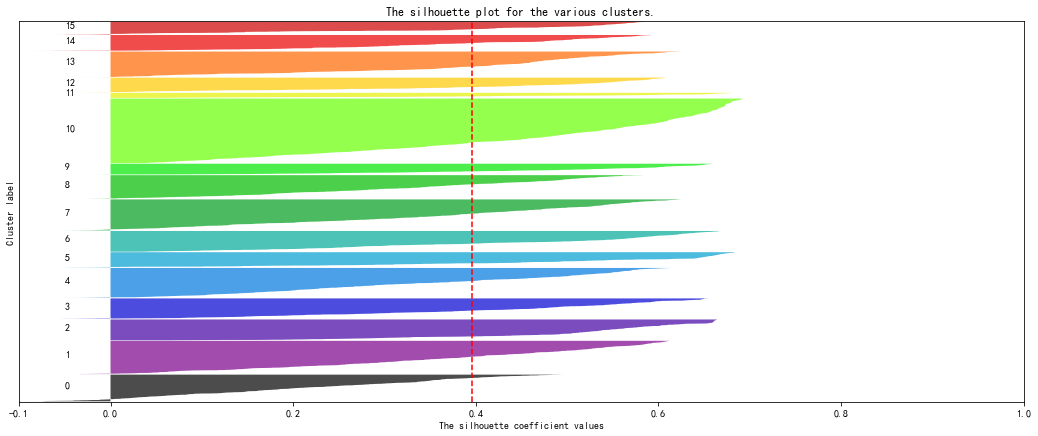

In [8]:
data = np.array(data[['startweidu','startjingdu']],type(float))
X=data
cluster_labels=model
for n_clusters in [2,3,4,5,6,7,8,10,12,13,16]:
    n_clusters = n_clusters
    # 设置画布
    fig, ax1 = plt.subplots(1)
    # 设置画布尺寸
    fig.set_size_inches(18, 7)
    # 设置画布X轴
    ax1.set_xlim([-0.1, 1])
    # 设置画布Y轴：X.shape[0]代表着柱状的宽度，(n_clusters + 1) * 10代表着柱与柱之间的间隔
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    # 模型实例化
    clusterer = KMeans(n_clusters=n_clusters, random_state=100)
    # 开始训练模型
    clusterer = clusterer.fit(X)
    # 提取训练结果中的预测标签
    cluster_labels = clusterer.labels_
    # 提取训练结果中的轮廓系数均值
    silhouette_avg = silhouette_score(X, cluster_labels)
    # 打印出当前的簇数与轮廓系数均值
    print("簇数为", n_clusters,
          "，轮廓系数均值为", silhouette_avg)
    # 提取每一个样本的轮廓系数
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    # 设置Y轴的起始坐标
    y_lower = 10
    # 添加一个循环，把每一个样本的轮廓系数画在图中
    for i in range(n_clusters):
        # 提取第i个簇下的所有样本轮廓系数
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        # 对样本的轮廓系数进行排序（降序）
        ith_cluster_silhouette_values.sort()
        # 设置当前簇的柱状宽度（使用样本数量）以便于设置下一个簇的起始坐标
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        # 设置Y轴第i个簇的起始坐标
        y_upper = y_lower + size_cluster_i
        # 设置颜色
        color = cm.nipy_spectral(float(i)/n_clusters)
        # 画图
        ax1.fill_betweenx(np.arange(y_lower, y_upper)
                         ,ith_cluster_silhouette_values
                         ,facecolor=color
                         ,alpha=0.7
                         )
        ax1.text(-0.05
                 , y_lower + 0.5 * size_cluster_i
                 , str(i))
        y_lower = y_upper + 10
    # 设置图的标题
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # 添加轮廓系数均值线，使用虚线
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

       id   carid  startday starttime  startweidu  startjingdu    endday  \
0       4  459074  1/5/2018   6:09:49   39.970322   116.351395  1/5/2018   
1       3  420604  1/5/2018   6:07:14   39.756088   116.312943  1/5/2018   
2       5  165558  1/5/2018   6:17:56   39.953842   116.436539  1/5/2018   
3      29  258590  1/5/2018   8:09:42   39.850845   116.488724  1/5/2018   
4      28  373864  1/5/2018   8:08:09   39.986801   116.442032  1/5/2018   
...   ...     ...       ...       ...         ...          ...       ...   
7543  759  299501  3/5/2018  13:57:37   39.955215   116.358261  3/5/2018   
7544  757  375130  3/5/2018  13:48:34   39.787674   116.326675  3/5/2018   
7545  756   29137  3/5/2018  13:47:58   39.776688   116.514816  3/5/2018   
7546  755  119594  3/5/2018  13:46:46   39.930496   116.236038  3/5/2018   
7547  758  373632  3/5/2018  13:49:44   39.925003   116.509323  3/5/2018   

       endtime   endweidu   endjingdu  行驶距离（km）  收取费用(元)      公里数单价  
0      7:00:24  3

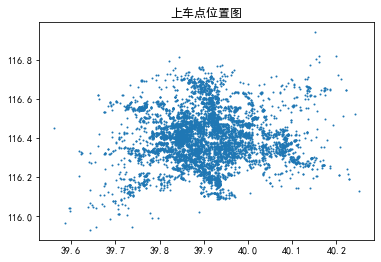

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
data=pd.read_csv(r'E:\OneDrive\桌面\4.17 2022数模大作业\B题  共享汽车运营策略探讨\附件3：B题数据.csv',encoding = 'gb2312')
print(data)
plt.scatter(data['startweidu'],data['startjingdu'],s=1)
plt.title('上车点位置图')
plt.savefig('dingjia')
plt.show()

<AxesSubplot:xlabel='startweidu', ylabel='startjingdu'>

E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
E:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


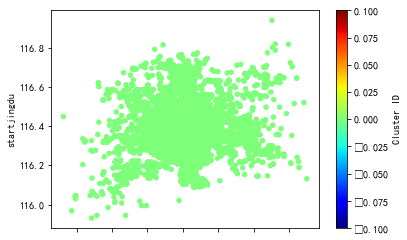

In [2]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=2, min_samples=8).fit(data[['startweidu','startjingdu']])
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='startweidu',y='startjingdu',c='Cluster ID', colormap='jet')

In [ ]:
plt.scatter(data['startday'],data['starttime'],s=20)
plt.title('wuyizchangjia')
plt.savefig('dingjia')
plt.show()